# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [2]:
# Load the data
df = pd.read_csv('data/sales.csv')
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [3]:
# Get more info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [4]:
# Get the dimensions of the data frame
df.shape

(4248, 20)

# Data Cleaning

In [5]:
# Check for duplicates
print('There are', df.duplicated().sum(), 'duplicates.')

There are 0 duplicates.


In [6]:
# Check for missing values
print('There are', df.isna().sum().sum(), 'missing values.')

There are 0 missing values.


In [7]:
# Check the labels
cat_cols = df.select_dtypes('object').columns

for col in cat_cols:
    print('The labels for the', col, 'column.')
    print(df[col].value_counts())
    print()

The labels for the State column.
Utah             288
California       288
Colorado         264
Oregon           264
Nevada           264
Washington       240
Ohio             216
Illinois         216
Florida          216
Wisconsin        216
Missouri         216
Iowa             216
New York         192
Louisiana        168
Oklahoma         168
Texas            168
New Mexico       168
New Hampshire    168
Connecticut      168
Massachusetts    144
Name: State, dtype: int64

The labels for the Market column.
West       1344
Central    1344
East        888
South       672
Name: Market, dtype: int64

The labels for the Market Size column.
Small Market    2544
Major Market    1704
Name: Market Size, dtype: int64

The labels for the Date column.
04/01/10 00:00:00    177
07/01/10 00:00:00    177
06/01/11 00:00:00    177
09/01/10 00:00:00    177
03/01/10 00:00:00    177
08/01/10 00:00:00    177
05/01/10 00:00:00    177
02/01/10 00:00:00    177
12/01/11 00:00:00    177
05/01/11 00:00:00    17

# Data Visualizations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

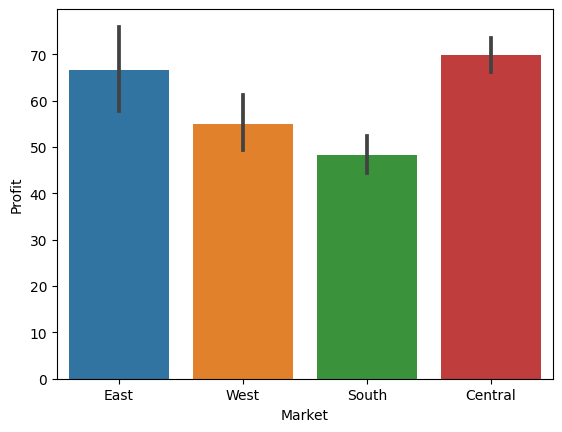

In [9]:
# Barplot of Profit vs. Market
sns.barplot(data = df, x = 'Market', y = 'Profit');

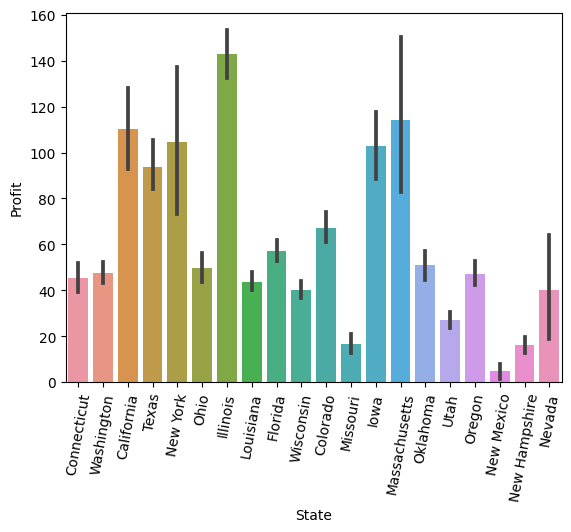

In [10]:
# Barplot of Profic vs. State
sns.barplot(data = df, x = 'State', y = 'Profit');
plt.xticks(rotation = 80);

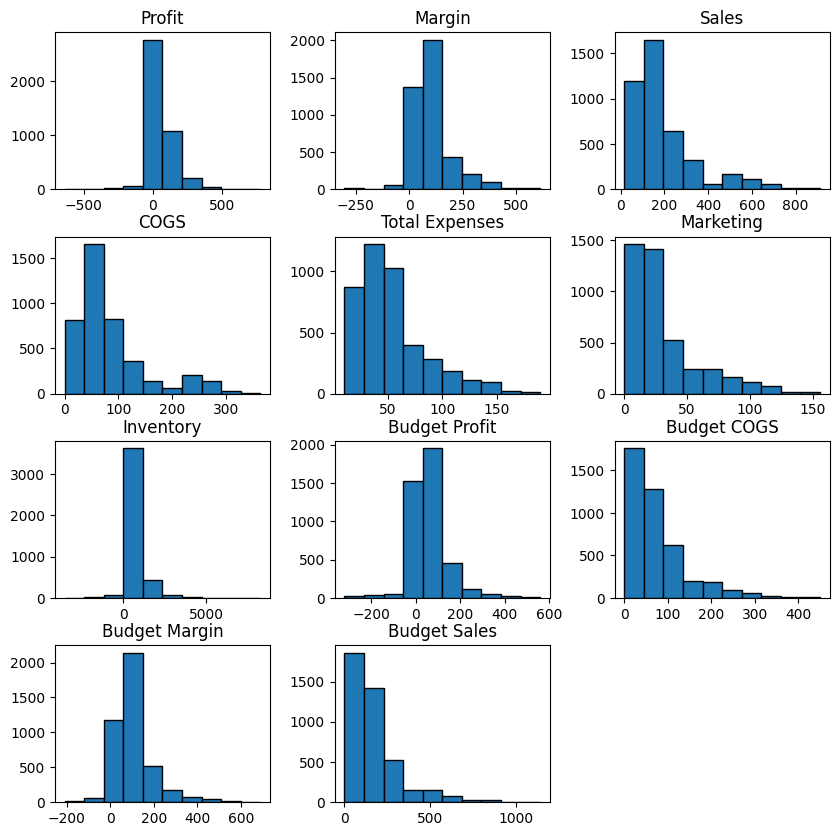

In [11]:
# Construct histograms
df.drop(columns = ['Area Code', 'ProductId']).hist(figsize = (10, 10), grid = False, edgecolor = 'k');

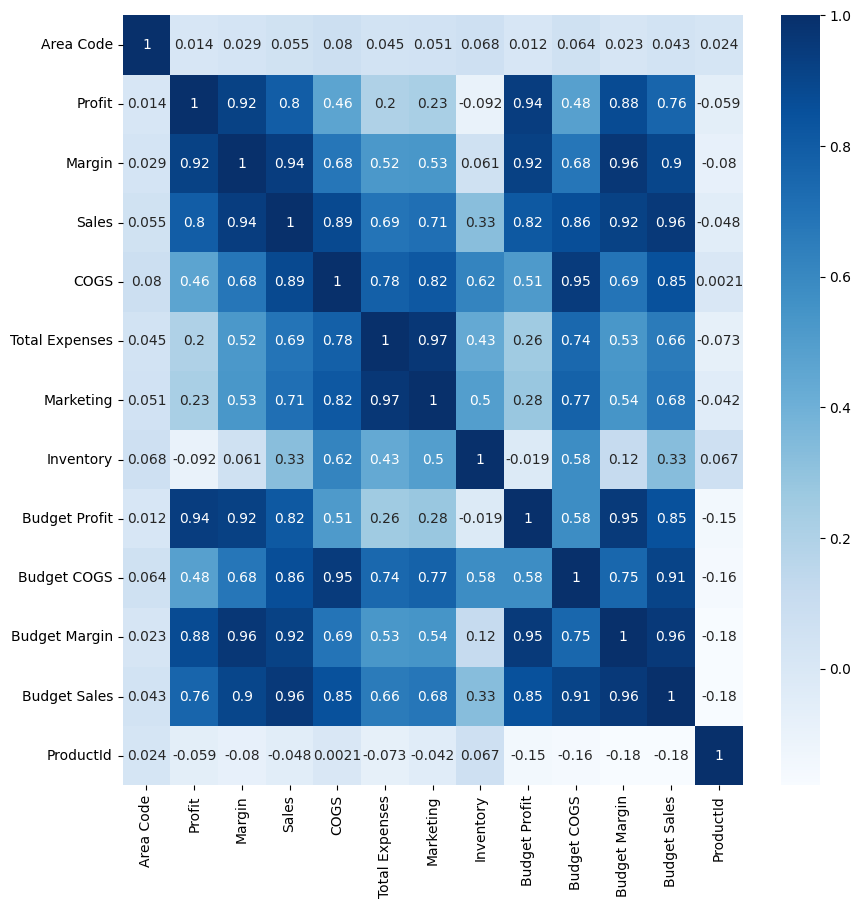

In [12]:
# Make a heatmap of correlations
corr = df.corr()
plt.figure(figsize = (10, 10));
sns.heatmap(corr, annot = True, cmap = 'Blues');

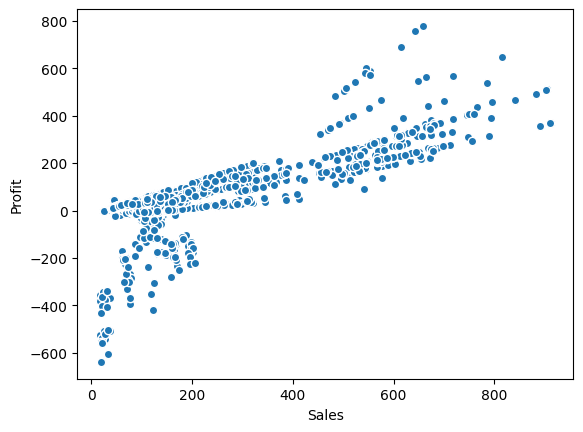

In [13]:
# Scatterplot of Profit vs. Sales
plt.scatter(x = df['Sales'], y = df['Profit'], edgecolor = 'w');
plt.xlabel('Sales');
plt.ylabel('Profit');

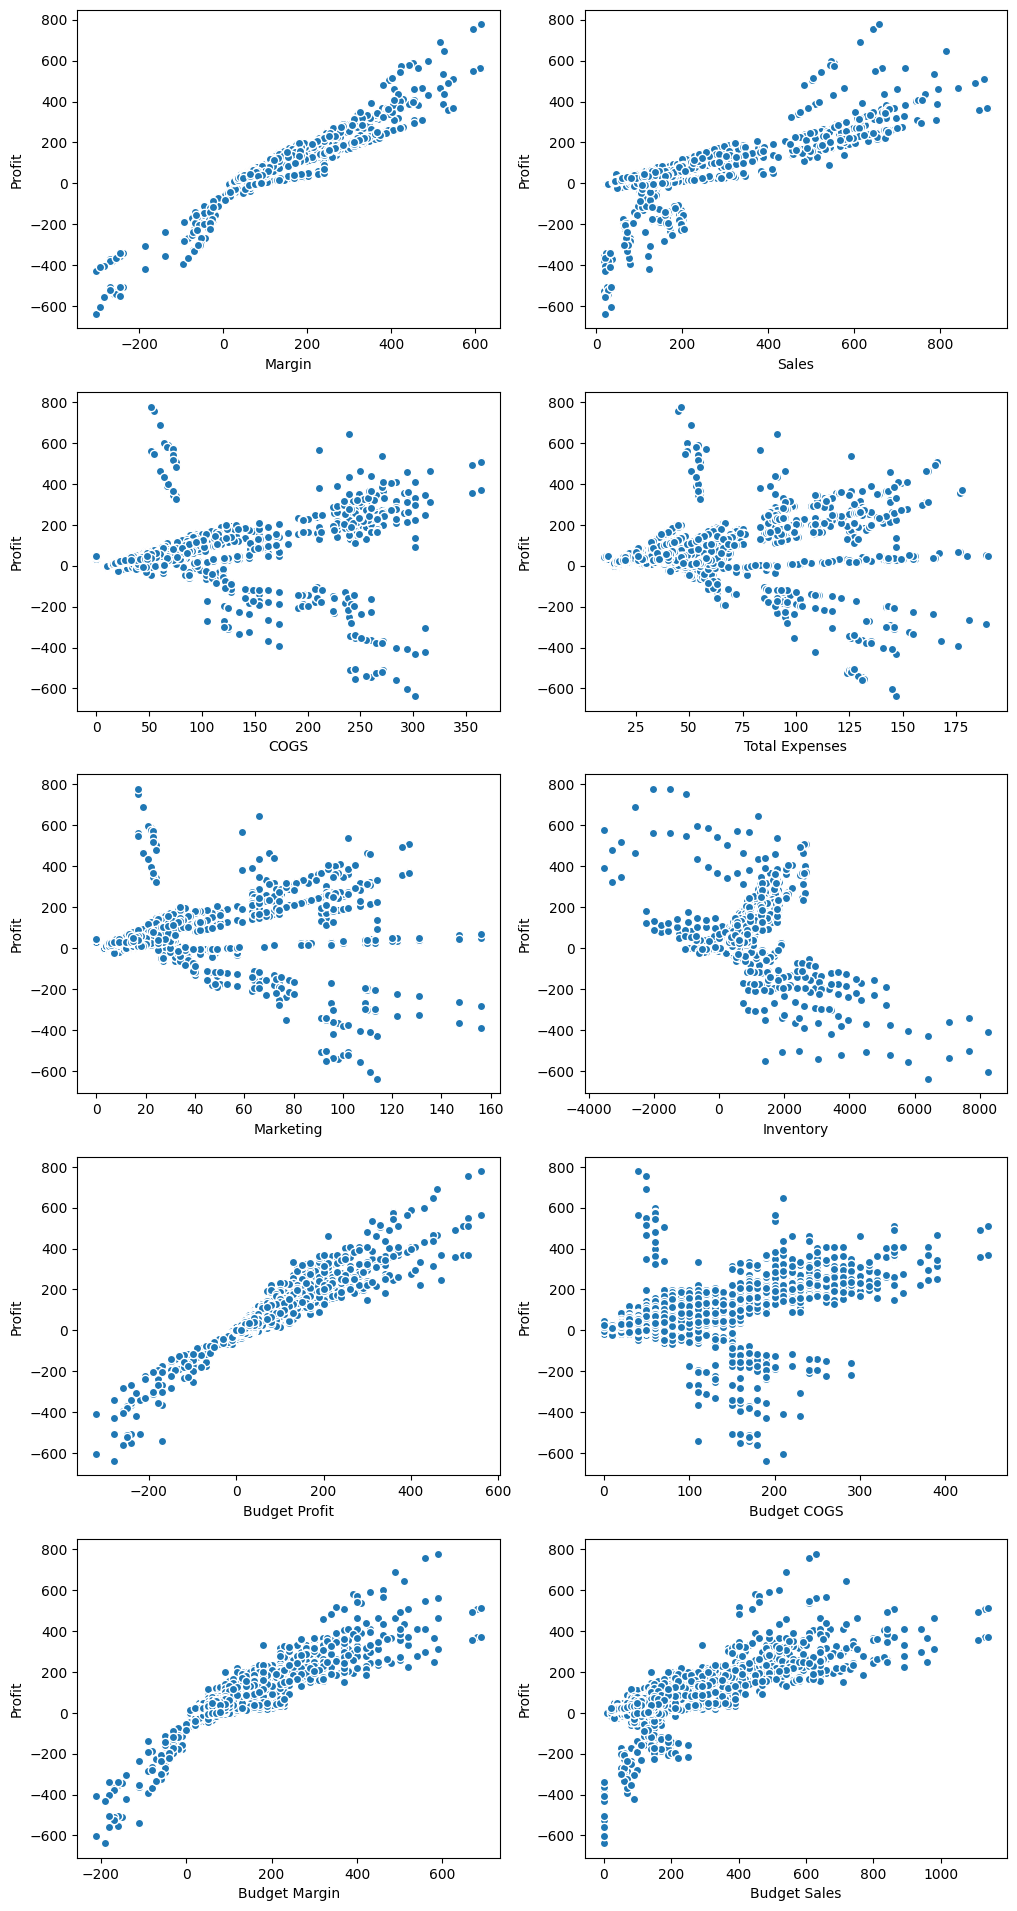

In [14]:
# More scatterplots
cols = df.select_dtypes(include = 'number').drop(columns = ['Profit',
                                                            'Area Code',
                                                            'ProductId'])
cols = cols.columns

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 24));
axes = axes.flatten()

for idx, col in enumerate(cols):
    axes[idx].scatter(y = df['Profit'], x = df[col], edgecolor = 'w')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Profit')